In [1]:
# Import libraries/packages

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

In [2]:
#Import data

med_file = r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D212\medical_clean.csv"
df_load = pd.read_csv(med_file)
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# Separate out the continuous variables for PCA
df = df_load[['Lat', 'Lng', 'Income','VitD_levels','Initial_days','TotalCharge','Additional_charges']]

In [4]:
# View size of table
df.shape

(10000, 7)

In [5]:
# Scale data
d = df.values
scaler = StandardScaler()
scaler.fit(d)
d_scaled = scaler.transform(d)

In [6]:
#Convert scaled data back to .csv and export
med_scaled_for_PCA = pd.DataFrame(d_scaled)
med_scaled_for_PCA.to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D212\medical_scaled_for_PCA.csv")

In [7]:
# Perform PCA
pca_30 = PCA(n_components = 7, random_state=7)
pca_30.fit(d_scaled)
pc = pca_30.transform(d_scaled)

In [8]:
print(pc)

[[-1.16232809 -0.89116719  0.20242862 ...  1.49484808  0.0746936
   0.113405  ]
 [-0.85651247 -1.30469681 -0.59465829 ...  0.5669678   0.69372811
   0.14111486]
 [-1.70285184  0.95600301 -0.94321758 ... -0.64507604 -0.20537163
  -0.14821563]
 ...
 [ 1.91521692 -0.59678638  0.61472305 ...  0.30014236 -0.0442254
  -0.0030557 ]
 [ 1.51318798  1.28679811 -0.26059217 ...  0.4986083  -0.19941288
  -0.00643024]
 [ 1.77977836 -0.33350922  0.42999298 ...  0.57957825 -0.90031483
  -0.1381137 ]]


In [9]:
#Create a data frame of only principal components
pc_df = pd.DataFrame(pc, columns = {'PC1','PC2','PC3','PC4','PC5', 'PC6','PC7'})
print(pc_df)

           PC5       PC2       PC7       PC3       PC4       PC6       PC1
0    -1.162328 -0.891167  0.202429  1.096272  1.494848  0.074694  0.113405
1    -0.856512 -1.304697 -0.594658  0.532190  0.566968  0.693728  0.141115
2    -1.702852  0.956003 -0.943218  0.271018 -0.645076 -0.205372 -0.148216
3    -1.918832  0.741779  0.365019  0.255635 -0.626027 -0.489817 -0.151047
4    -1.943979 -0.701367 -0.122409 -1.712677 -1.165979 -0.196280 -0.122268
...        ...       ...       ...       ...       ...       ...       ...
9995  0.936814 -0.945528  0.638958 -0.374000 -0.265916 -0.306406  0.050568
9996  1.767012 -0.588169 -1.926808  1.524060 -0.675674 -0.770908 -0.174717
9997  1.915217 -0.596786  0.614723  0.743460  0.300142 -0.044225 -0.003056
9998  1.513188  1.286798 -0.260592 -1.107707  0.498608 -0.199413 -0.006430
9999  1.779778 -0.333509  0.429993 -0.029121  0.579578 -0.900315 -0.138114

[10000 rows x 7 columns]


In [10]:
# Cmopute the covariance matrix
Load = pd.DataFrame(pca_30.components_.T,
                   columns=['PC1','PC2','PC3','PC4','PC5', 'PC6','PC7'],
                index=df.columns)
Load

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Lat,-0.012385,0.707635,0.012997,-0.008349,-0.093509,-0.700082,0.001355
Lng,-0.011393,-0.698869,-0.109214,-0.088224,-0.112635,-0.692138,-0.000174
Income,-0.019039,-0.086107,0.621626,0.392351,0.651181,-0.166813,0.001180
VitD_levels,-0.003094,0.058388,-0.576982,-0.328228,0.744122,-0.047118,-0.001440
Initial_days,0.706503,0.000265,0.022866,-0.020951,0.009143,-0.014145,-0.706830
TotalCharge,0.706831,-0.001082,0.007592,-0.000811,0.009079,-0.013292,0.707157
Additional_charges,0.024252,-0.003272,-0.517683,0.854420,-0.025478,-0.020168,-0.017759


In [11]:
# Calculate variance explained by all 5 components
print('Variance explained by all 7 principal components = ', sum(pca_30.explained_variance_ratio_*100))

Variance explained by all 7 principal components =  99.99999999999999


In [12]:
# Variance explained by each PC
varex1 = pca_30.explained_variance_ratio_*100
var_df1 = pd.DataFrame(varex1.round(2), columns=['Captured Variance Per PC'], 
                       index = ['PC1','PC2','PC3','PC4','PC5', 'PC6','PC7'])
var_df1

,Captured Variance Per PC
PC1,28.41
PC2,15.91
PC3,14.58
PC4,14.17
PC5,14.13
PC6,12.63
PC7,0.17


In [13]:
# Eigenvalues by principal component
eigenvalues = pca_30.explained_variance_
eigen_df = pd.DataFrame(eigenvalues.round(4), columns=['Eigenvalues Per PC'], index=['PC1','PC2','PC3','PC4','PC5', 'PC6','PC7'])
eigen_df

,Eigenvalues Per PC
PC1,1.9891
PC2,1.1136
PC3,1.0206
PC4,0.9923
PC5,0.9891
PC6,0.8841
PC7,0.0120


In [14]:
# Calculate cumulative sum of each principal component
np.cumsum(pca_30.explained_variance_ratio_*100)

array([ 28.41296828,  44.31953577,  58.89792933,  73.07195715,
        87.19991134,  99.82797284, 100.        ])

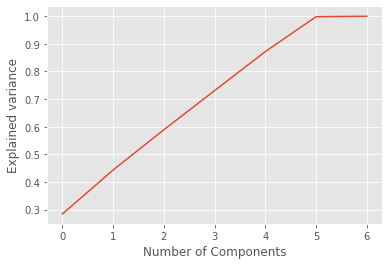

In [15]:
# Scree Plot
plt.plot(np.cumsum(pca_30.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi=100)

In [21]:
# print the cumulative sum of each PC in an easier to read way
print('Variance explained by the first principal component =',
     np.cumsum(pca_30.explained_variance_ratio_*100)[0])
print('Variance explained by the first 2 principal components =',
     np.cumsum(pca_30.explained_variance_ratio_*100)[1])
print('Variance explained by the first 3 principal components =',
     np.cumsum(pca_30.explained_variance_ratio_*100)[2])
print('Variance explained by the first 4 principal components =',
     np.cumsum(pca_30.explained_variance_ratio_*100)[3])
print('Variance explained by the first 5 principal components =',
     np.cumsum(pca_30.explained_variance_ratio_*100)[4])
print('Variance explained by the first 6 principal components =',
     np.cumsum(pca_30.explained_variance_ratio_*100)[5])

Variance explained by the first principal component = 28.412968276302863
Variance explained by the first 2 principal components = 44.31953577157415
Variance explained by the first 3 principal components = 58.89792932999446
Variance explained by the first 4 principal components = 73.07195715387496
Variance explained by the first 5 principal components = 87.19991134239092
Variance explained by the first 6 principal components = 99.82797283912738


<function matplotlib.pyplot.show(close=None, block=None)>

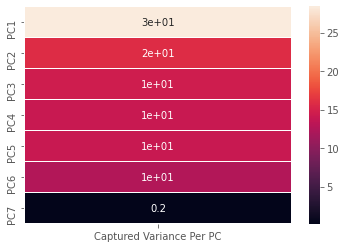

In [22]:
# Create heat map of top 6 principal components
sns.heatmap(var_df1, annot=True, linewidth=0.5, fmt='.1g')
plt.show

In [24]:
# run the PCA model on the most significant 6 principal components
pca2 = PCA(n_components=6, random_state=7)
pca2.fit(d_scaled)
trans_pca2 = pca2.transform(d_scaled)
var=pca2.explained_variance_ratio_*100
var_df = pd.DataFrame(var.round(2), columns = ['Explained Variance'], index=['PC1','PC2','PC3', 'PC4','PC5','PC6'])
var_df

,Explained Variance
PC1,28.41
PC2,15.91
PC3,14.58
PC4,14.17
PC5,14.13
PC6,12.63


In [25]:
# Prepare 'ReAdmis' for visualization 
df_load.ReAdmis.replace(('Yes','No'),(1,0),inplace=True)
dft = df_load[['ReAdmis','Income','VitD_levels','Initial_days','TotalCharge','Additional_charges']]

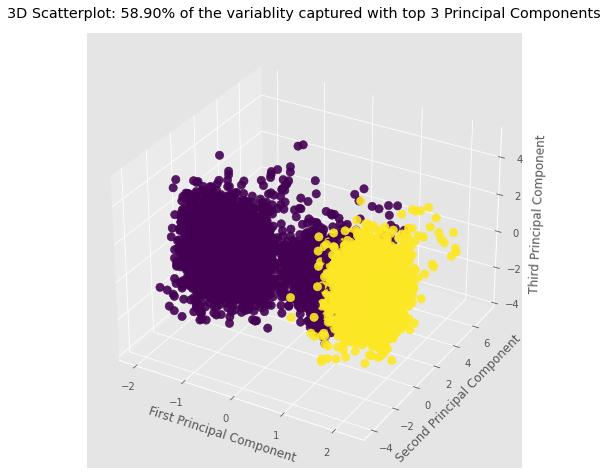

In [27]:
# Plot top 3 principal components on 3D scatterplot and separate by 'ReAdmis'
fgi=plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(trans_pca2[:,0], trans_pca2[:,1], trans_pca2[:,2],
                    c= dft['ReAdmis'], s = 70, alpha=0.90)
plt.title('3D Scatterplot: 58.90% of the variablity captured with top 3 Principal Components', pad=15)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.savefig('3d_scatterplot.png')

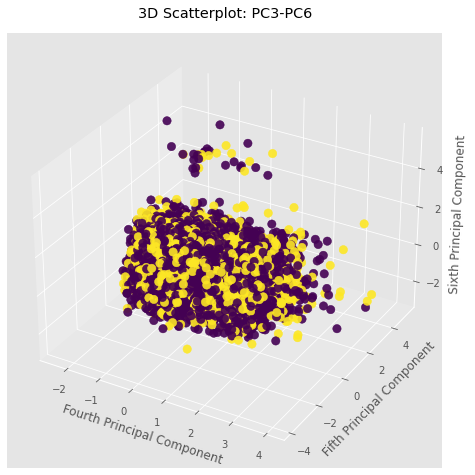

In [28]:
# Plot principal components 3-6 on 3D scatterplot and separate by 'ReAdmis'
fgi=plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(trans_pca2[:,3], trans_pca2[:,4], trans_pca2[:,5],
                    c= dft['ReAdmis'], s = 70, alpha=0.90)
plt.title('3D Scatterplot: PC3-PC6', pad=15)
ax.set_xlabel('Fourth Principal Component')
ax.set_ylabel('Fifth Principal Component')
ax.set_zlabel('Sixth Principal Component')
plt.savefig('3d_scatterplot.png')